In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [3]:
X, y = load_iris(return_X_y=True)

X.shape

(150, 4)

In [4]:
X = standard_scale(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=48,
                                                    stratify=y)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [6]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979905, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021057, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697206, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929558, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [7]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329987, 22.850761786701774, 3.6689218892828697, 0.517870910715493]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [8]:
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [9]:
Z = X.dot(W)

In [10]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y,
                                                    test_size=0.25,
                                                    random_state=48,
                                                    stratify=y)
Z_train.shape, Z_test.shape

((112, 2), (38, 2))

In [11]:
model_1 = AdaBoostClassifier(n_estimators=3, random_state=13)
# model_1.fit(X_train, y_train)
# model_1.score(X_train, y_train), model_1.score(X_test, y_test)

In [12]:
train_err = []
test_err = []
for n in range(1, 25):
    model = AdaBoostClassifier(n_estimators=n, random_state=13)
    model.fit(X_train, y_train)
    train_err.append(round(model.score(X_train, y_train),3))
    test_err.append(round(model.score(X_test, y_test),3))

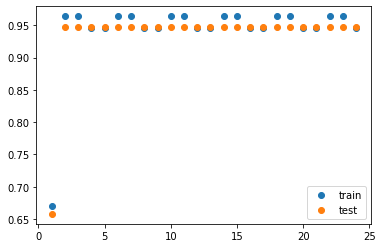

In [13]:
plt.scatter(range(1, 25), train_err, label='train')
plt.scatter(range(1, 25), test_err, label='test')
plt.legend()
plt.show()

In [14]:
model_1.fit(X_train, y_train)
round(model_1.score(X_train, y_train), 4), round(model_1.score(X_test, y_test),4)

(0.9643, 0.9474)

In [15]:
model_1.fit(Z_train, y_train)
round(model_1.score(Z_train, y_train), 4), round(model_1.score(Z_test, y_test),4)

(0.9375, 0.9211)

In [16]:
model_2 = RandomForestClassifier(n_estimators=10, min_samples_leaf=3, random_state=13)
# model_2.fit(X_train, y_train)
# model_2.score(X_train, y_train), model_2.score(X_test, y_test)

In [17]:
train_err = []
test_err = []
for n in range(1, 25):
    model = RandomForestClassifier(n_estimators=n, min_samples_leaf=3, random_state=13)
    model.fit(X_train, y_train)
    train_err.append(round(model.score(X_train, y_train),3))
    test_err.append(round(model.score(X_test, y_test),3))

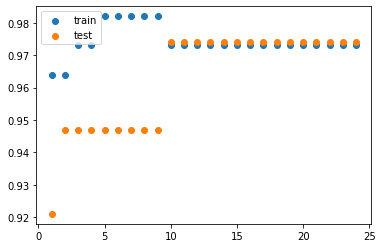

In [18]:
plt.scatter(range(1, 25), train_err, label='train')
plt.scatter(range(1, 25), test_err, label='test')
plt.legend()
plt.show()

In [19]:
model_2.fit(X_train, y_train)
round(model_2.score(X_train, y_train), 4), round(model_2.score(X_test, y_test),4)

(0.9732, 0.9737)

In [20]:
model_2.fit(Z_train, y_train)
round(model_2.score(Z_train, y_train), 4), round(model_2.score(Z_test, y_test),4)

(0.9554, 0.9211)

In [21]:
# vc = VotingClassifier(estimators=[('ab', model_1), ('rf', model_2)], n_jobs=-1)
# vc.fit(X_train, y_train)

# vc.score(X_train, y_train), vc.score(X_test, y_test)

In [22]:
model_3 = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [23]:
model_3.fit(X_train, y_train)
round(model_3.score(X_train, y_train), 4), round(model_3.score(X_test, y_test),4)

(1.0, 0.9737)

In [24]:
model_3.fit(Z_train, y_train)
round(model_3.score(Z_train, y_train), 4), round(model_3.score(Z_test, y_test),4)

(1.0, 0.9737)

В общем для случайного леса и AdaBoost, снижение размерности только испортило метрику, для KNN ничего не поменялось. По-видимому, слишком мало свойств и данных, чтобы увидеть выгоду от снижения количества свойств

Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()



In [25]:
u, s, v = np.linalg.svd(X)

In [26]:
u.shape, s.shape, v.shape

((150, 150), (4,), (4, 4))

In [27]:
s, v

(array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239]),
 array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
        [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
        [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]]))

In [28]:
w_svd = v.T[:, :2]
w_svd

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [29]:
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [30]:
Z_svd = X.dot(w_svd)
Z_svd[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

In [31]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])